# KARBAPENEM DİRENÇLİ ENTEROBACTERIACEAE ENFEKSİYONU RİSK FAKTÖRLERİ VE ENFEKSİYONU OLAN HASTALARDA MORTALİTENİN DEĞERLENDİRİLMESİ

**Makine Öğrenmesi Yöntemleri ile Değerlendirilmesi**


---


Prof. Dr. Gül Ruhsar YILMAZ

Prof. Dr. Muhammet DEMİRBİLEK

Öğr. Gör. Süleyman EZDEMİR

Talha DEMİRBİLEK

Ensar DEMİRBİLEK


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/data_apache_yas.csv')

Eksik Verileri NaN olarak değiştirelim.

In [ ]:
dataset.replace("?",np.nan, inplace=True)
dataset

,apache,yas,vaka
0,8.0,64,1
1,18.0,69,1
2,18.0,66,1
3,17.0,66,1
4,10.0,75,1
...,...,...,...
435,8.0,79,2
436,21.0,74,2
437,6.0,58,2
438,8.0,65,2


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   apache  284 non-null    float64
 1   yas     440 non-null    int64  
 2   vaka    440 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 10.4 KB


In [ ]:
maxyas=dataset.yas.max()
i=0
s=0
for yas in dataset.yas:
  if yas==maxyas:
    print(i)
    s=i
  i+=1
print(dataset.iloc[s])
dataset=dataset.drop(dataset.index[s])


306
apache     17.0
yas       667.0
vaka        2.0
Name: 306, dtype: float64


# Eksik Veri

Eksik verilerin bulunduğu satırları silme

In [ ]:
dataset_1=dataset.dropna()

In [ ]:
print(dataset_1.dtypes)
dataset_1

apache    float64
yas         int64
vaka        int64
dtype: object


,apache,yas,vaka
0,8.0,64,1
1,18.0,69,1
2,18.0,66,1
3,17.0,66,1
4,10.0,75,1
...,...,...,...
435,8.0,79,2
436,21.0,74,2
437,6.0,58,2
438,8.0,65,2


In [ ]:
dataset_1.loc.apache = dataset_1.apache.astype(int)
print(dataset_1.dtypes)

apache    int64
yas       int64
vaka      int64
dtype: object


In [ ]:
dataset_1

,apache,yas,vaka
0,8,64,1
1,18,69,1
2,18,66,1
3,17,66,1
4,10,75,1
...,...,...,...
435,8,79,2
436,21,74,2
437,6,58,2
438,8,65,2


In [ ]:
X = dataset_1.iloc[:, :-1].values
y = dataset_1.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[ 7 83]
 [15 50]
 [16 74]
 [27 68]
 [17 82]
 [22 81]
 [22 86]
 [ 5 59]
 [34 70]
 [12 64]
 [ 6 90]
 [13 51]
 [ 9 67]
 [15 77]
 [17 71]
 [21 60]
 [21 70]
 [13 50]
 [15 60]
 [18 51]
 [ 9 72]
 [19 82]
 [11 78]
 [34 94]
 [23 55]
 [35 51]
 [18 88]
 [13 87]
 [ 7 23]
 [20 74]
 [28 69]
 [18 75]
 [ 0 41]
 [15 77]
 [17 65]
 [20 59]
 [25 77]
 [15 80]
 [26 85]
 [16 78]
 [ 5 71]
 [10 75]
 [11 61]
 [28 92]
 [ 8 82]
 [10 73]
 [24 74]
 [12 77]
 [ 5 72]
 [ 7 57]
 [41 60]
 [18 64]
 [14 60]
 [13 62]
 [18 67]
 [13 80]
 [ 2 46]
 [ 6 81]
 [ 9 74]
 [17 66]
 [15 75]
 [30 59]
 [26 59]
 [25 66]
 [22 77]
 [11 87]
 [10 45]
 [12 82]
 [ 8 68]
 [11 53]
 [ 2 50]
 [10 66]
 [ 7 27]
 [18 66]
 [16 45]
 [ 9 91]
 [ 2 52]
 [43 72]
 [ 9 48]
 [ 9 69]
 [23 81]
 [11 39]
 [31 73]
 [18 27]
 [21 74]
 [23 56]
 [ 8 71]
 [ 1 42]
 [19 64]
 [16 76]
 [10 59]
 [ 9 75]
 [ 6 33]
 [11 78]
 [22 80]
 [27 91]
 [20 62]
 [19 76]
 [ 6 73]
 [11 87]
 [26 73]
 [18 48]
 [ 8 80]
 [ 2 53]
 [25 69]
 [18 75]
 [21 69]
 [19 66]
 [ 8 64]
 [14 52]
 [15 75]
 

In [ ]:
print(y_train)

[2 1 2 2 1 2 1 2 1 1 1 1 2 1 1 2 1 2 1 2 2 2 2 2 1 1 1 1 2 2 1 1 2 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 2 2 2 1 1 1
 2 1 2 1 1 2 1 1 1 1 2 2 1 1 2 2 1 2 2 1 2 1 2 2 1 1 2 1 2 1 2 2 1 1 1 1 1
 2 2 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 2 1 1 2 1 2 1 1 2 2 2 2 1 1 2 1 1 1 1
 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 2 2 1 2 2 1 2 1 2 2 2 1 2 1 2
 1 2 2 1 2 2 1 1 1 2 2 2 2 1 2 1 1 1 2 2 1 2 2 2 1 1 2]


In [ ]:
print(X_test)

[[58 83]
 [22 45]
 [17 58]
 [19 73]
 [ 9 82]
 [23 55]
 [ 3 72]
 [15 87]
 [ 7 73]
 [25 55]
 [ 5 74]
 [24 72]
 [10 78]
 [ 4 60]
 [14 82]
 [ 1 23]
 [13 77]
 [29 73]
 [23 80]
 [15 82]
 [ 5 35]
 [18 83]
 [ 7 71]
 [ 9 73]
 [ 2 39]
 [10 59]
 [13 67]
 [ 7 73]
 [12 66]
 [11 73]
 [34 59]
 [17 69]
 [21 79]
 [20 79]
 [ 5 68]
 [21 72]
 [20 61]
 [12 81]
 [ 3 37]
 [28 85]
 [14 72]
 [11 21]
 [24 51]
 [ 7 54]
 [18 76]
 [11 71]
 [ 0 44]
 [26 81]
 [ 5 38]
 [25 54]
 [24 63]
 [21 57]
 [10 77]
 [11 67]
 [ 7 68]
 [ 8 79]
 [18 61]
 [28 92]
 [22 66]
 [16 59]
 [31 73]
 [13 40]
 [ 7 57]
 [10 83]
 [ 5 37]
 [22 40]
 [25 75]
 [11 50]
 [ 7 69]
 [ 6 77]
 [ 7 66]]


In [ ]:
print(y_test)

[1 1 1 2 2 2 2 2 1 1 1 2 1 2 1 2 2 1 1 1 1 2 2 2 1 1 1 2 2 2 1 1 1 1 2 1 1
 1 2 1 1 2 2 2 1 2 1 2 2 2 1 1 2 1 1 2 2 2 2 2 1 2 2 2 2 1 1 2 2 1 2]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-1.01966861e+00  1.01967183e+00]
 [-9.68521945e-02 -1.22643149e+00]
 [ 1.84998574e-02  4.07098201e-01]
 [ 1.28737243e+00 -1.28422145e-03]
 [ 1.33851909e-01  9.51608097e-01]
 [ 7.10612168e-01  8.83544360e-01]
 [ 7.10612168e-01  1.22386304e+00]
 [-1.25037271e+00 -6.13857855e-01]
 [ 2.09483679e+00  1.34843253e-01]
 [-4.42908350e-01 -2.73539170e-01]
 [-1.13502066e+00  1.49611799e+00]
 [-3.27556298e-01 -1.15836775e+00]
 [-7.88964506e-01 -6.93479585e-02]
 [-9.68521945e-02  6.11289412e-01]
 [ 1.33851909e-01  2.02906990e-01]
 [ 5.95260117e-01 -5.45794118e-01]
 [ 5.95260117e-01  1.34843253e-01]
 [-3.27556298e-01 -1.22643149e+00]
 [-9.68521945e-02 -5.45794118e-01]
 [ 2.49203961e-01 -1.15836775e+00]
 [-7.88964506e-01  2.70970727e-01]
 [ 3.64556013e-01  9.51608097e-01]
 [-5.58260402e-01  6.79353149e-01]
 [ 2.09483679e+00  1.76837294e+00]
 [ 8.25964220e-01 -8.86112803e-01]
 [ 2.21018884e+00 -1.15836775e+00]
 [ 2.49203961e-01  1.35999052e+00]
 [-3.27556298e-01  1.29192678e+00]
 [-1.01966861e+00 -3

In [ ]:
print(X_test)

[[ 4.86328603e+00  1.01967183e+00]
 [ 7.10612168e-01 -1.56675017e+00]
 [ 1.33851909e-01 -6.81921592e-01]
 [ 3.64556013e-01  3.39034464e-01]
 [-7.88964506e-01  9.51608097e-01]
 [ 8.25964220e-01 -8.86112803e-01]
 [-1.48107682e+00  2.70970727e-01]
 [-9.68521945e-02  1.29192678e+00]
 [-1.01966861e+00  3.39034464e-01]
 [ 1.05666832e+00 -8.86112803e-01]
 [-1.25037271e+00  4.07098201e-01]
 [ 9.41316272e-01  2.70970727e-01]
 [-6.73612454e-01  6.79353149e-01]
 [-1.36572476e+00 -5.45794118e-01]
 [-2.12204246e-01  9.51608097e-01]
 [-1.71178092e+00 -3.06415239e+00]
 [-3.27556298e-01  6.11289412e-01]
 [ 1.51807653e+00  3.39034464e-01]
 [ 8.25964220e-01  8.15480623e-01]
 [-9.68521945e-02  9.51608097e-01]
 [-1.25037271e+00 -2.24738754e+00]
 [ 2.49203961e-01  1.01967183e+00]
 [-1.01966861e+00  2.02906990e-01]
 [-7.88964506e-01  3.39034464e-01]
 [-1.59642887e+00 -1.97513259e+00]
 [-6.73612454e-01 -6.13857855e-01]
 [-3.27556298e-01 -6.93479585e-02]
 [-1.01966861e+00  3.39034464e-01]
 [-4.42908350e-01 -1

# SVM Algoritması

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
print(classifier.predict(sc.transform([[45,0]])))

[1]


In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 2]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[34  0]
 [37  0]]


0.4788732394366197

<ipython-input-127-d7ea1924e473>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


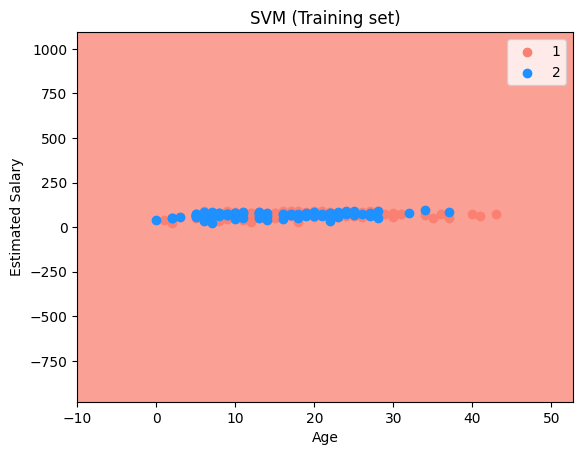

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-128-461b2a28a803>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


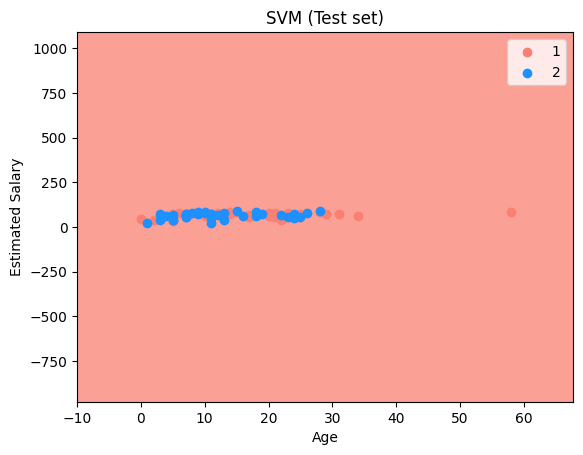

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()